# LMS

Procesamiento Adaptativo de Señales Aleatorias

© Marc S. Ressl

In [26]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

Este ejemplo representa la evolución de $w(n)$, el error cuadrático de muestra $J_s(n)$, la estimación de la curva de aprendizaje $J(n)$, y la convergencia teórica de un filtro LMS.

Aplicamos el algoritmo LMS a un problema de predicción. Estimamos el coeficiente $a$ de un modelo autorregresivo de orden uno a través de un predictor de orden uno. Cuando el predictor converge, su coeficiente $w$ tenderá a $-a$.

## Modelo autorregresivo lineal

In [27]:
# Parámetros del modelo autorregresivo lineal de orden 1
sigma2v = 0.0186264
a = -0.99

def get_model_output(N):
    '''
    Calcula la salida del modelo
    '''
    # N_IIR evita dependencia temporal con el arranque del modelo autorregresivo
    N_IIR = 1000
    
    v = np.random.normal(0, np.sqrt(sigma2v), size=(N_IIR + N))
    x = signal.lfilter([1], [1, a], v)
    
    return x[N_IIR:]

## Implementación

In [28]:
def calc_lms_montecarlo(K, w0, mu, N):
    """
    Realiza una simulación de Monte-Carlo del algoritmo LMS.
    
    K: número de simulaciones de Monte-Carlo
    w0: valor inicial del filtro adaptativo
    mu: parámetro de paso
    N: número de iteraciones
    """
    
    # Simulación de Monte Carlo
    w_montecarlo = np.zeros((N, 1))
    J_montecarlo = np.zeros((N, 1))
    
    for i in range(K):
        x = get_model_output(N)
        
        # Predicción LMS
        w = np.zeros((N, 1))
        J = np.zeros((N, 1))
        w[0] = w0
        
        for n in range(1, N):
            y_hat = w[n - 1] * x[n - 1]             # Ecuación de filtrado
            y = x[n]
            e = y - y_hat
            J[n - 1] = e * e
            w[n] = w[n - 1] + mu * x[n - 1] * e     # Ecuación LMS
            
        J[N - 1] = J[N - 2]
        
        w_montecarlo += w
        J_montecarlo += J
        
    w_montecarlo /= K
    J_montecarlo /= K
    
    return (w_montecarlo, J_montecarlo)

def plot_Js(J):
    plt.figure(figsize=(12, 8))
    plt.semilogy(J)
    plt.xlabel('$n$', fontsize=14)
    plt.ylim(1e-7, 1e1)
    plt.ylabel('$J_s(n)$', fontsize=14)
    plt.grid(True)
    plt.title('$J_s(n)$, $µ=%s$' % mu1, fontsize=14)
    plt.show()

In [29]:
mu1 = 0.08
mu2 = 0.02
mu3 = 0.005
N = 2000
w0 = 0

## Convergencia de una realización

In [30]:
K = 1

w1, J1 = calc_lms_montecarlo(K, w0, mu1, N)
w2, J2 = calc_lms_montecarlo(K, w0, mu2, N)
w3, J3 = calc_lms_montecarlo(K, w0, mu3, N)

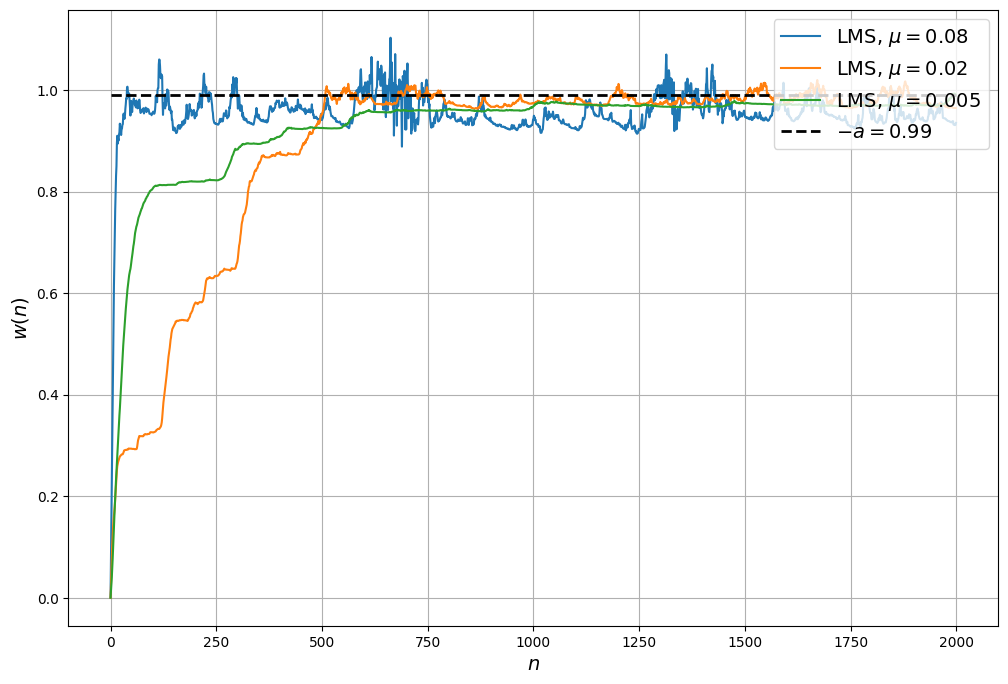

In [31]:
plt.figure(figsize=(12, 8))
plt.plot(w1, label='LMS, $µ=%s$' % mu1)
plt.plot(w2, label='LMS, $µ=%s$' % mu2)
plt.plot(w3, label='LMS, $µ=%s$' % mu3)
plt.plot([0, len(w1) - 1], [-a, -a], color='k', linestyle='--', linewidth=2, label='$-a=%s$' % -a)
plt.xlabel('$n$', fontsize=14)
plt.ylabel('$w(n)$', fontsize=14)
plt.grid(True)
plt.legend(loc='upper right', fontsize=14)
plt.show()

Conforme disminuye $\mu$, disminuye el desajuste, pero aumenta también la velocidad de convergencia.

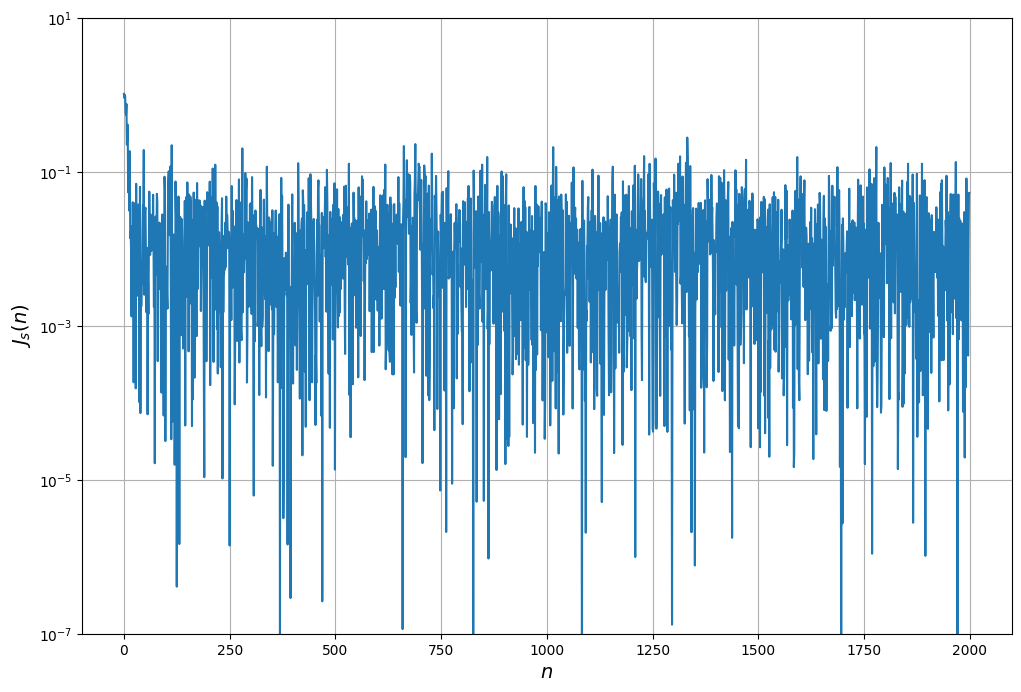

In [32]:
plt.figure(figsize=(12, 8))
plt.semilogy(J1)
plt.xlabel('$n$', fontsize=14)
plt.ylim(1e-7, 1e1)
plt.ylabel('$J_s(n)$', fontsize=14)
plt.grid(True)
plt.show()

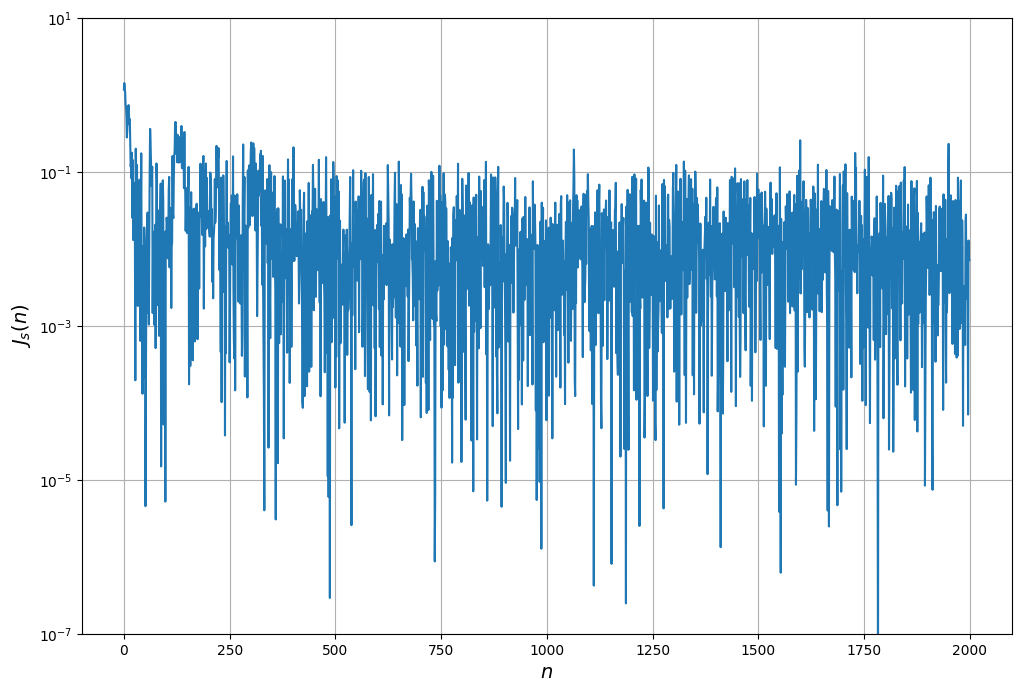

In [33]:
plt.figure(figsize=(12, 8))
plt.semilogy( J2)
plt.xlabel('$n$', fontsize=14)
plt.ylim(1e-7, 1e1)
plt.ylabel('$J_s(n)$', fontsize=14)
plt.grid(True)
plt.show()

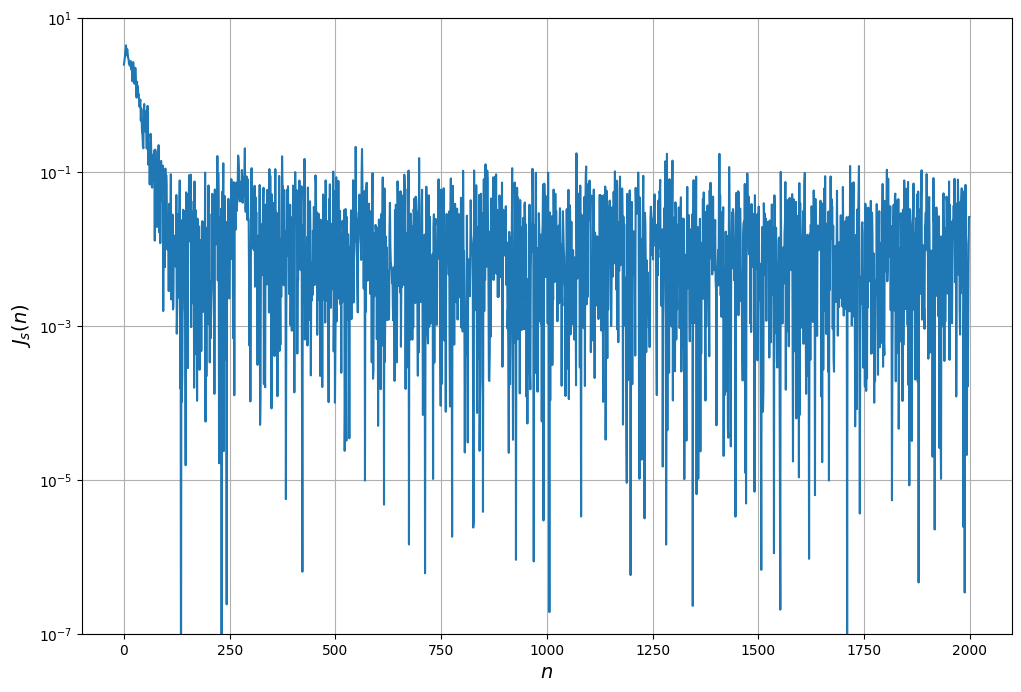

In [34]:
plt.figure(figsize=(12, 8))
plt.semilogy(J3)
plt.xlabel('$n$', fontsize=14)
plt.ylim(1e-7, 1e1)
plt.ylabel('$J_s(n)$', fontsize=14)
plt.grid(True)
plt.show()

El error cuadrático de muestra es muy ruidoso por la estimación del gradiente de LMS.

## Curva de aprendizaje con simulación de Monte-Carlo

Se calculan 10000 realizaciones, lo cual puede tardar varios minutos. Disminuyendo $K$, disminuye el tiempo de cálculo, pero aumenta también el ruido de la estimación de $J(n)$.

In [35]:
K = 20

w1_mc, J1_mc = calc_lms_montecarlo(K, w0, mu1, N)
w2_mc, J2_mc = calc_lms_montecarlo(K, w0, mu2, N)
w3_mc, J3_mc = calc_lms_montecarlo(K, w0, mu3, N)

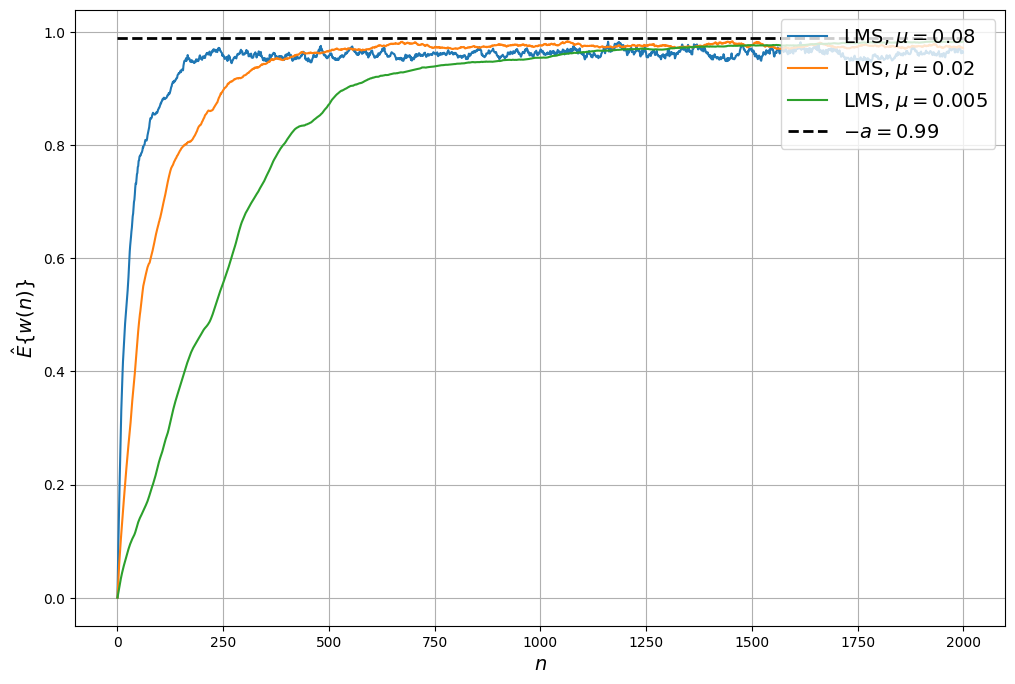

In [36]:
plt.figure(figsize=(12, 8))
plt.plot(w1_mc, label='LMS, $µ=%s$' % mu1)
plt.plot(w2_mc, label='LMS, $µ=%s$' % mu2)
plt.plot(w3_mc, label='LMS, $µ=%s$' % mu3)
plt.plot([0, len(J1_mc) - 1], [-a, -a], color='k', linestyle='--', linewidth=2, label='$-a=%s$' % -a)
plt.xlabel('$n$', fontsize=14)
plt.ylabel('$\hat{E}\{w(n)\}$', fontsize=14)
plt.grid(True)
plt.legend(loc='upper right', fontsize=14)
plt.show()

Cuando $\mu$ no es chico, LMS no converge siempre al valor verdadero de $-a$. El error disminuye conforme $\mu$ es más pequeño.

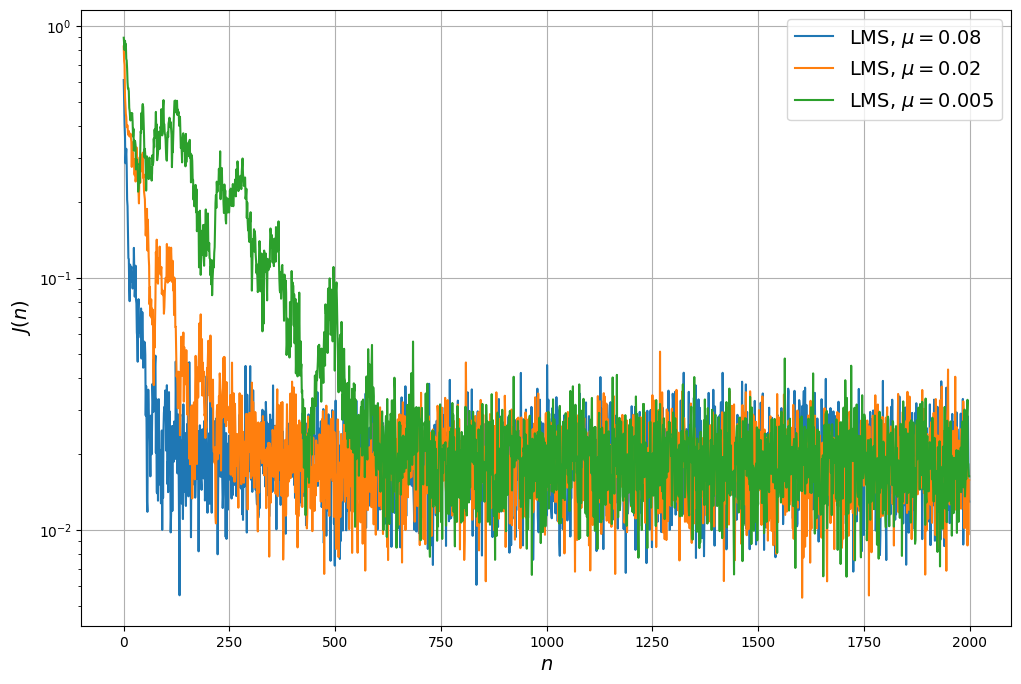

In [37]:
plt.figure(figsize=(12, 8))
plt.semilogy(J1_mc, label='LMS, $µ=%s$' % mu1)
plt.semilogy(J2_mc, label='LMS, $µ=%s$' % mu2)
plt.semilogy(J3_mc, label='LMS, $µ=%s$' % mu3)
plt.xlabel('$n$', fontsize=14)
plt.ylabel('$J(n)$', fontsize=14)
plt.grid(True)
plt.legend(loc='upper right', fontsize=14)
plt.show()

Conforme disminuye $\mu$, disminuye el desajuste, pero disminuye también la velocidad de convergencia.

## Comparación entre $J(n)$ y la aproximación teórica $J_t(n)$

In [38]:
def get_sigma2x(sigma2v, a):
    '''
    Calcula la energía de salida del modelo autorregresivo lineal
    '''
    return sigma2v / (1.0 - a * a)

def calc_theoretical_jn(sigma2v, a, mu, N):
    '''
    Determina el valor teórico de J(n)
    '''
    sigma2x = get_sigma2x(sigma2v, a)

    J = np.zeros((N, 1));
    for n in range(N):
        J[n] = sigma2v + mu * sigma2v * sigma2x / 2 + \
            sigma2x * (a * a - mu * sigma2v / 2) * \
            ((1 - mu * sigma2x) ** (2 * n))
    
    return J

In [39]:
mu = 0.001
N = 10000
w0 = 0

In [40]:
K = 20

w4_mc, J4_mc = calc_lms_montecarlo(K, w0, mu, N)
J4_t = calc_theoretical_jn(sigma2v, a, mu, N)

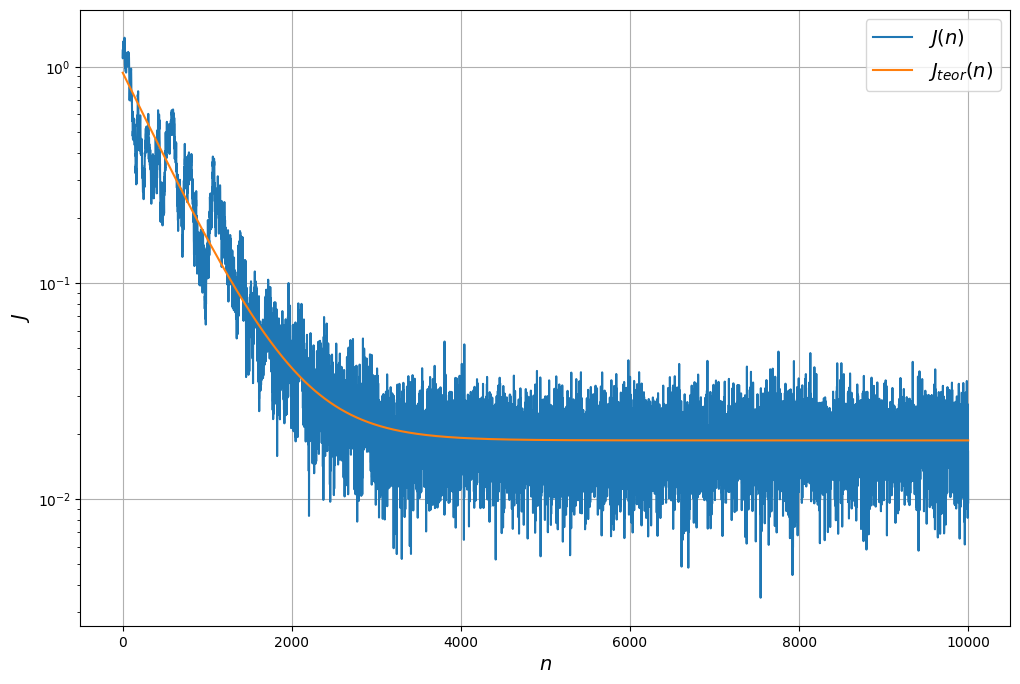

In [41]:
plt.figure(figsize=(12, 8))
plt.semilogy(J4_mc, label='$J(n)$')
plt.semilogy(J4_t, label='$J_{teor}(n)$')
plt.xlabel('$n$', fontsize=14)
plt.ylabel('$J$', fontsize=14)
plt.grid(True)
plt.legend(loc='upper right', fontsize=14)
plt.show()

Hay una correspondencia aceptable entre la aproximación teórica y el resultado empírico.

Las diferencias se deben a que $\mu$ no es pequeño.